In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_dataset=pd.read_csv('Google_Stock_Price_Train.csv')


In [3]:
train_dataset.head(20)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [4]:
train_dataset.shape

(1258, 6)

In [5]:
train_dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
training_set=train_dataset.iloc[:,1:2].values

In [7]:
training_set.shape

(1258, 1)

In [9]:
#FEATURE SCALING

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


In [14]:
#CREATING A DATA STRUCTURE WITH 50 TIMESTEPS
Xtrain=[]
Ytrain=[]
for i in range(60,training_set_scaled.shape[0]):
    Xtrain.append(training_set_scaled[i-60:i,0])
    Ytrain.append(training_set_scaled[i,0])

#To make Xtrain and Ytrain an 2D array
Xtrain,Ytrain=np.array(Xtrain),np.array(Ytrain)

In [16]:
Xtrain.shape

(1198, 60)

In [17]:
Ytrain.shape

(1198,)

In [19]:
#RESHAPING TO GET MORE PRECISION

Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))

In [20]:
Xtrain.shape

(1198, 60, 1)

## BUILDING THE RNN

In [21]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [22]:
model=Sequential()

In [24]:
model.add(LSTM(units=50,return_sequences=True,input_shape = (Xtrain.shape[1], 1)))
model.add(Dropout(0.2))

In [25]:
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

In [26]:
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

In [27]:
model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [28]:
model.add(Dense(units = 1))

In [30]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [31]:
model.fit(Xtrain, Ytrain, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0649
Epoch 2/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0063
Epoch 3/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0059
Epoch 4/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0048
Epoch 7/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0046
Epoch 8/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0044
Epoch 10/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0039
Epoch 12/100
1198/1198 [==============================] - 11s 

1198/1198 [==============================] - 11s 9ms/step - loss: 0.0015
Epoch 97/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0017
Epoch 98/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0015


## PREDICTIONS


In [32]:
test_dataset=pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=test_dataset.iloc[:,1:2].values

In [33]:
test_dataset.shape

(20, 6)

In [35]:
total_dataset=pd.concat((train_dataset['Open'],test_dataset['Open']),axis=0)

In [36]:
total_dataset.shape

(1278,)

In [37]:
total_dataset.tail(10)

10    805.81
11    805.12
12    806.91
13    807.25
14    822.30
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, dtype: float64

In [39]:
inputs = total_dataset[len(total_dataset) - len(test_dataset) - 60:].values

In [40]:
inputs.shape

(80,)

In [41]:
inputs=inputs.reshape(-1,1)

In [42]:
inputs.shape

(80, 1)

In [43]:
inputs=sc.transform(inputs)

In [44]:
Xtest = []
for i in range(60, 80):
    Xtest.append(inputs[i-60:i, 0])
Xtest = np.array(Xtest)
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))

In [45]:
predictions=model.predict(Xtest)

In [46]:
predicted_stock_price = sc.inverse_transform(predictions)

## VISUALIZING THE TEST RESULTS

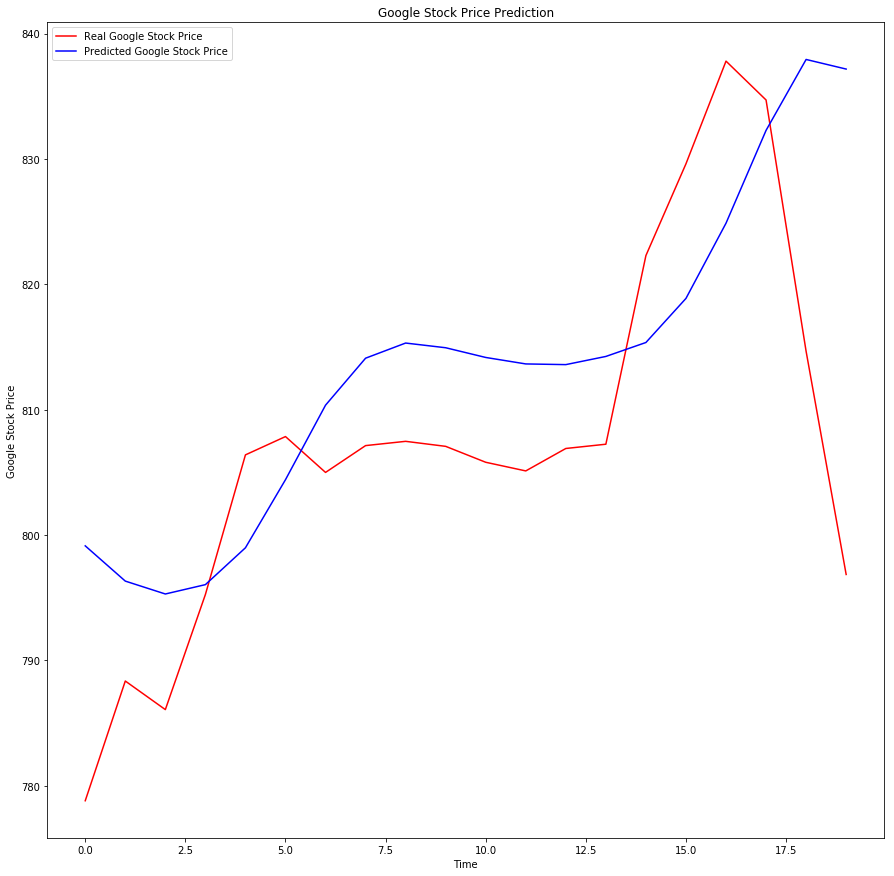

In [48]:
plt.figure(figsize=(15,15))
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()